In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split # Imports the train_test_split function from scikit-learn to split datasets into training and testing sets.
from sklearn.preprocessing import StandardScaler #  Imports StandardScaler for standardizing features.
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from xgboost import XGBClassifier # Imports the XGBoost gradient boosting classifier.
from sklearn import metrics # Imports evaluation metrics from scikit-learn.

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"D:\csv_file\GOOG.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100
4857,2023-12-05,130.369995,133.539993,129.729996,132.389999,132.389999,19216500


In [15]:
df.shape

(4858, 7)

In [17]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
std,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


# Exploratory Data Analysis

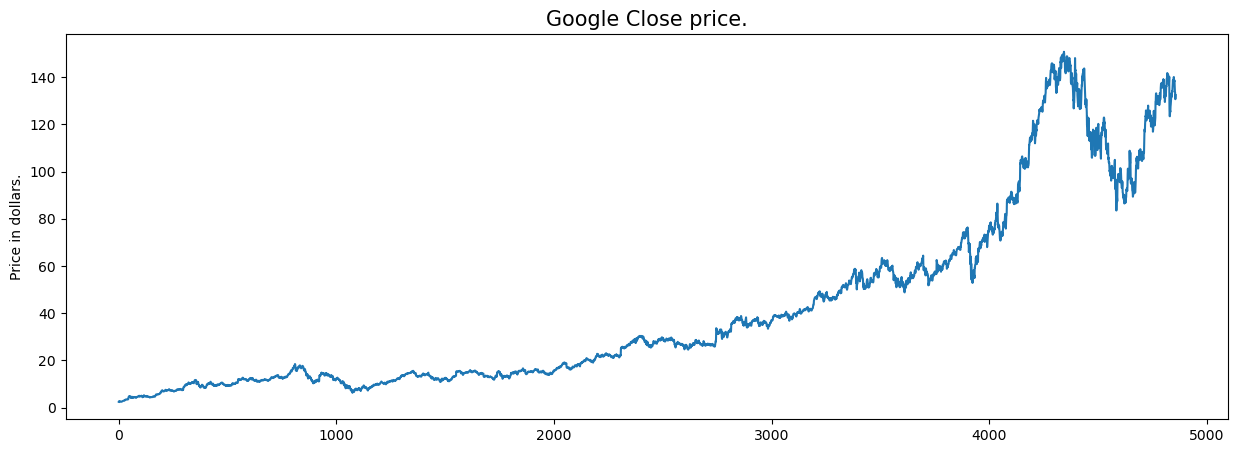

In [24]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Google Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [26]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [28]:
df[df['Close'] == df['Adj Close']].shape # to check data is valid 

(4858, 7)

In [30]:
df = df.drop(['Adj Close'], axis=1)

In [32]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

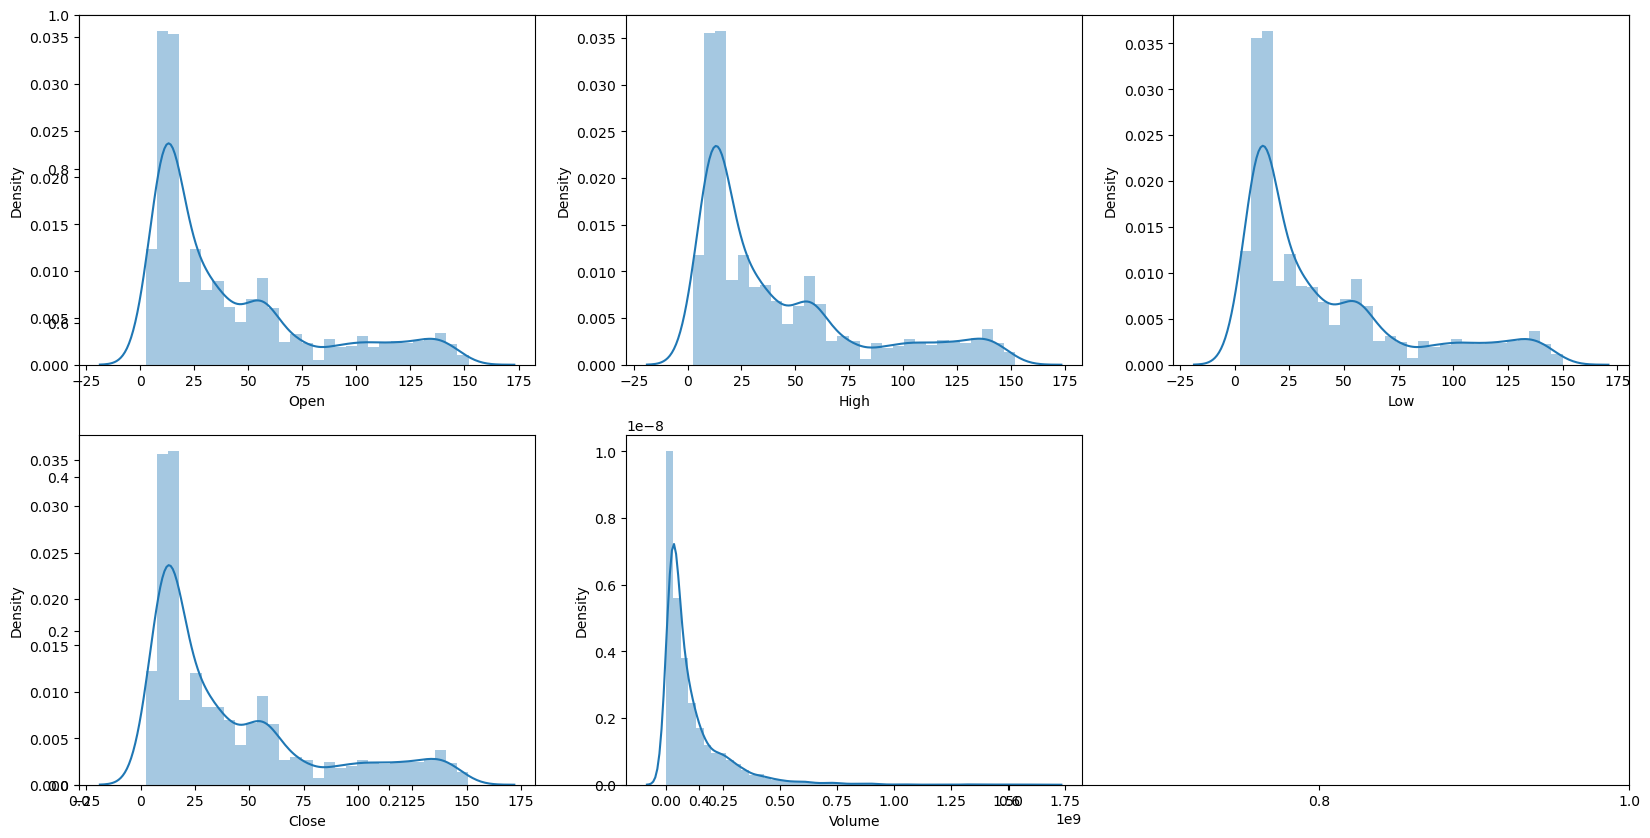

In [34]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

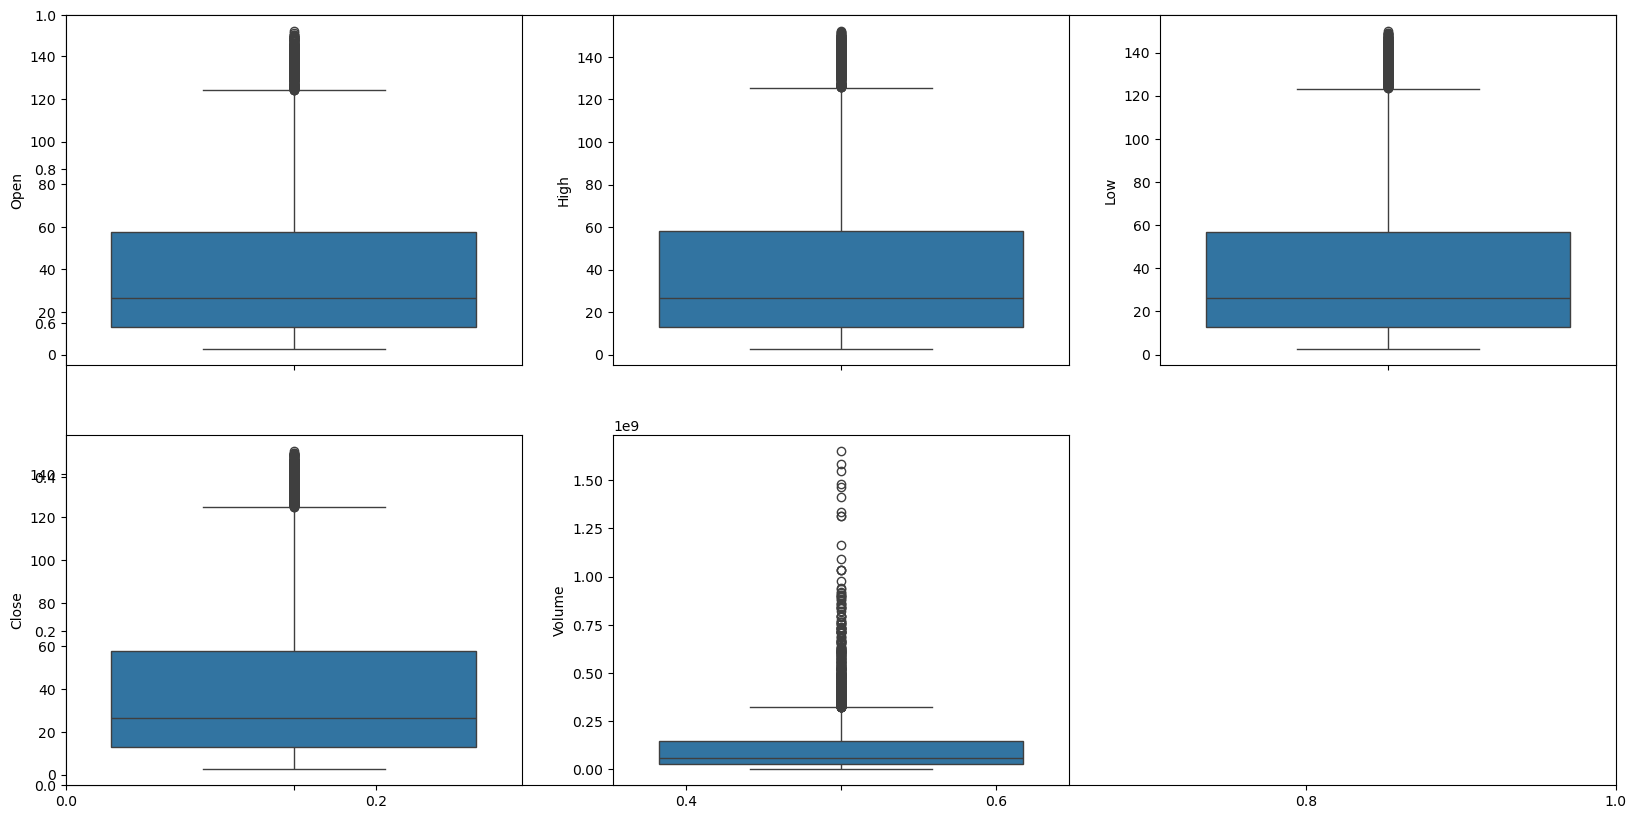

In [42]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()

In [50]:
# Using feature engineering for increasing performance in model 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # Convert 'Date' column to datetime format

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216,19,8,2004
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,20,8,2004
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,23,8,2004
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,24,8,2004
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,25,8,2004


In [54]:
df['is_quarter_end'] = np.where(df['month']%3 == 0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216,19,8,2004,0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,20,8,2004,0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,23,8,2004,0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,24,8,2004,0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,25,8,2004,0


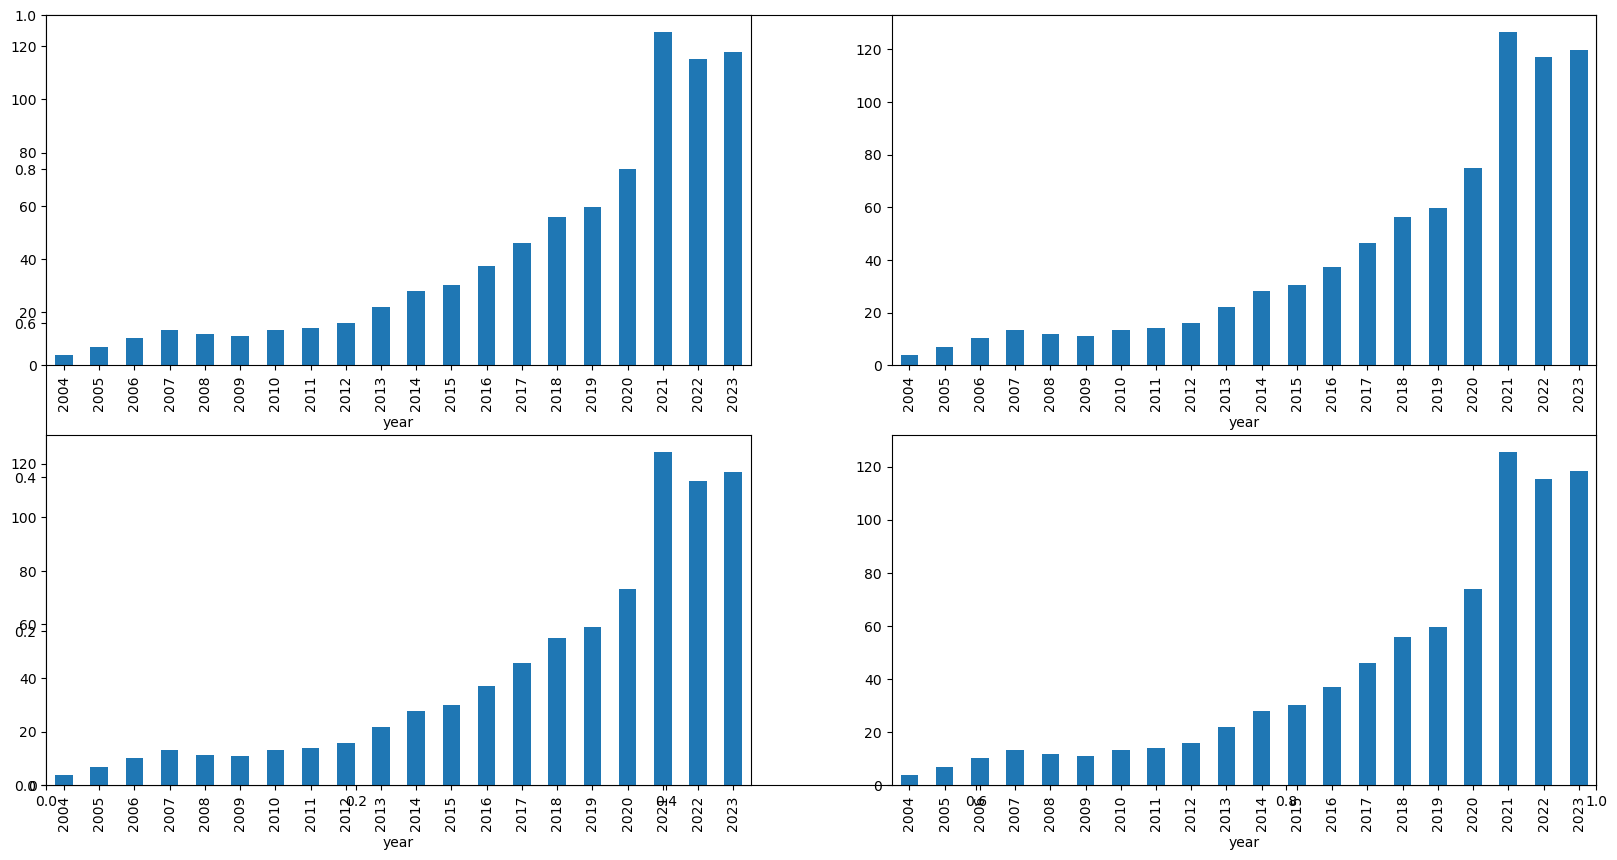

In [56]:
data_grouped = df.drop('Date', axis = 1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [58]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,41.707116,42.161610,41.288374,41.737486,1.228721e+08,15.729503,6.159938,2013.836957
1,41.025153,41.436318,40.597686,41.016550,1.111368e+08,15.771062,7.463370,2013.644689


In [60]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

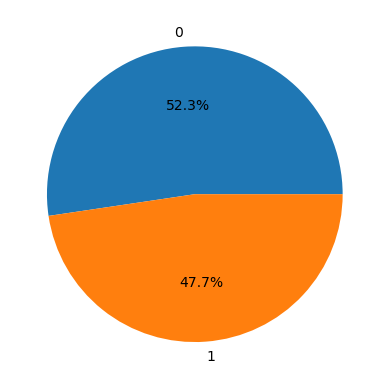

In [62]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

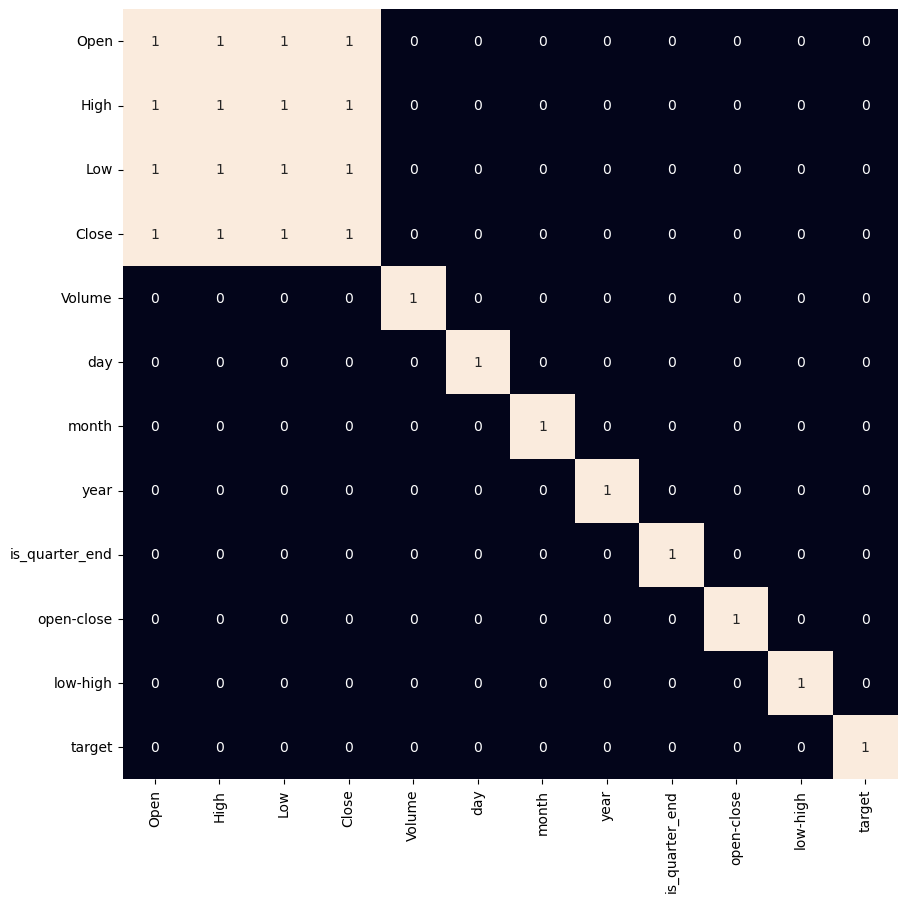

In [67]:
plt.figure(figsize=(10, 10)) 
# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

# Data Splitting and Normalization

In [69]:
features = df[['open-close','low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state= 2029)
print(X_train.shape, X_valid.shape)

(4372, 3) (486, 3)


# Model Development and Evaluation

In [78]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [79]:
from xgboost import XGBClassifier

In [83]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5086570144280429
Validation Accuracy :  0.537981162981163

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4959428270377008
Validation Accuracy :  0.5152197652197653

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Trainin

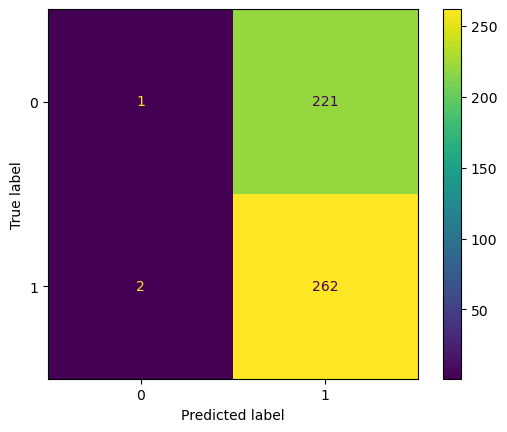

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0],X_valid,Y_valid)
plt.show()

In [89]:
df['Date'] = pd.to_datetime(df['Date'])
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_month_start'] = df['Date'].dt.is_month_start.astype(int)
df['rolling_mean_5'] = df['Open'].rolling(window=5).mean()

In [92]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
scaled_data = scaler.fit_transform(df[features])

# LSTM Model Improvements

In [99]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date (just to be sure)
df = df.sort_values('Date')

# Create date-based features
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_month_start'] = df['Date'].dt.is_month_start.astype(int)
df['is_month_end'] = df['Date'].dt.is_month_end.astype(int)
df['quarter'] = df['Date'].dt.quarter

# Create rolling window features
df['rolling_mean_5'] = df['Open'].rolling(window=5).mean()
df['rolling_std_5'] = df['Open'].rolling(window=5).std()

# Shifted lag features
df['lag_1'] = df['Open'].shift(1)
df['lag_2'] = df['Open'].shift(2)

# Drop rows with NaNs from rolling/lag
df = df.dropna()

In [101]:
# Model Architecture (Multivariate LSTM)

In [103]:
features = ['Open', 'High', 'Low', 'Close', 'Volume',
            'day', 'month', 'year', 'dayofweek', 'is_month_start', 'is_month_end', 
            'quarter', 'rolling_mean_5', 'rolling_std_5', 'lag_1', 'lag_2']

In [105]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

X = []
y = []

# Define how many previous time steps to consider
timesteps = 60

for i in range(timesteps, len(scaled_data)):
    X.append(scaled_data[i - timesteps:i])
    y.append(scaled_data[i, 0])  # Predicting 'Open' price

X, y = np.array(X), np.array(y)

In [113]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 882.6 kB/s eta 0:07:06
   ---------------------------------------- 0.5/376.0 MB 882.6 kB/s eta 0:07:06
   ---------------------------------------- 1.0/376.0 MB 967.3 kB/s eta 0:06:28
   ---------------------------------------- 1.3/376.0 MB 1.1 MB/s eta 0:05:47
   ---------------------------------------- 1.6/376.0 MB 1.2 MB/s eta 0:05:22
   ---------------------------------------- 1.6/376.0 MB 1.2 MB/s eta 0:05:22
   ---------------------------------------- 1.8/376.0 MB 1.0 MB/s eta 0:05:57
   ---------------------------------------- 2.1/376.0 MB 1.1 MB/s eta 0:05:51
   ---------------------------------------- 2.4/376.0 MB 1.1 MB/s eta 0:05:48
   -----

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [116]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.3))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

In [117]:
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0078 - val_loss: 0.0014
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 8.4888e-04 - val_loss: 0.0012
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 9.7324e-04 - val_loss: 0.0013
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 9.1478e-04 - val_loss: 0.0032
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 8.3163e-04 - val_loss: 0.0013
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 6.7147e-04 - val_loss: 0.0014
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 5.7654e-04 - val_loss: 0.0010
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 6.3753e-04 - val_loss: 0.0011
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 6.7481e-04 - val_loss: 0.0015
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 4.8676e-04 - val_loss: 0.0011
Epoch

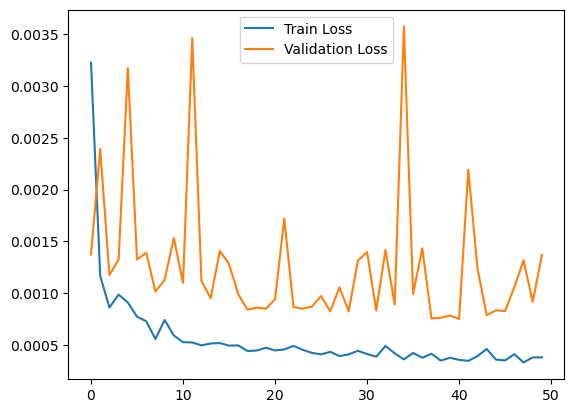

In [121]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Hyperparameter Tuning

In [124]:
pip install keras-tuner --quiet

Note: you may need to restart the kernel to use updated packages.


In [6]:
import keras_tuner
from kerastuner.tuners import RandomSearch

In [29]:
import pandas as pd
df = pd.read_csv(r"D:\csv_file\GOOG.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [31]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you want to predict 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

In [33]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def build_model(hp, input_shape=(60, 3)):  # Default shape
    model = Sequential()

    model.add(LSTM(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        return_sequences=True,
        input_shape=input_shape
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))

    model.add(LSTM(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32)
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [35]:
import numpy as np

# Assuming you already have the dataset loaded and scaled
X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshaping
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [37]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    lambda hp: build_model(hp, input_shape=(X.shape[1], X.shape[2])),
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuning_results',
    project_name='google_stock_lstm'
)

tuner.search(X, y, epochs=20, validation_split=0.1)


Trial 10 Complete [00h 00m 56s]
val_loss: 0.0008979047415778041

Best val_loss So Far: 0.0006405938765965402
Total elapsed time: 00h 12m 42s


In [43]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best units_1: {best_hps.get('units_1')}")
print(f"Best units_2: {best_hps.get('units_2')}")
print(f"Best dropout_1: {best_hps.get('dropout_1')}")
print(f"Best dropout_2: {best_hps.get('dropout_2')}")

Best units_1: 128
Best units_2: 96
Best dropout_1: 0.2
Best dropout_2: 0.1


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
D:\anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Make Predictions & Visualize Results

In [46]:
# Goal:
#      1. Predict stock prices on test data
#      2. Inverse transform predictions to real prices
#      3. Plot predicted vs actual prices

In [67]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df.set_index('Date', inplace=True)       # Set as index

In [69]:
# Recreate all engineered features on the full df
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek
df['is_month_start'] = df.index.is_month_start.astype(int)
df['is_month_end'] = df.index.is_month_end.astype(int)
df['quarter'] = df.index.quarter

df['rolling_mean_5'] = df['Open'].rolling(window=5).mean()
df['rolling_std_5'] = df['Open'].rolling(window=5).std()
df['lag_1'] = df['Open'].shift(1)
df['lag_2'] = df['Open'].shift(2)

# Drop NA rows after creating rolling and lag features
df.dropna(inplace=True)

In [73]:
print("Scaler was fit with:", scaler.feature_names_in_)  # Available in newer versions of sklearn

Scaler was fit with: ['Close']


In [83]:
test_days = 100
timesteps = 60

# Select the test data
test_data = df[-(test_days + timesteps):]  # Keep enough for lag/rolling

# Scale only the 'Close' column using the original scaler
scaled_test = scaler.transform(test_data[['Close']])

# Prepare X_test
X_test = []
for i in range(timesteps, len(scaled_test)):
    X_test.append(scaled_test[i - timesteps:i])

X_test = np.array(X_test)

# Reshape X_test to match the model's input shape (samples, timesteps, features)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get actual prices for comparison
actual_prices = test_data['Close'].values[timesteps:]

# Make predictions
predicted_prices = best_model.predict(X_test)

# Inverse transform the predictions and actual prices to original scale
predicted_prices = scaler.inverse_transform(predicted_prices)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [93]:
# Inverse Transform Predictions
# Add dummy columns to match scaler's inverse_transform shape
dummy = np.zeros((predicted_scaled.shape[0], len(features)))
dummy[:, 0] = predicted_scaled[:, 0]

predicted_prices = scaler.inverse_transform(dummy)[:, 0]

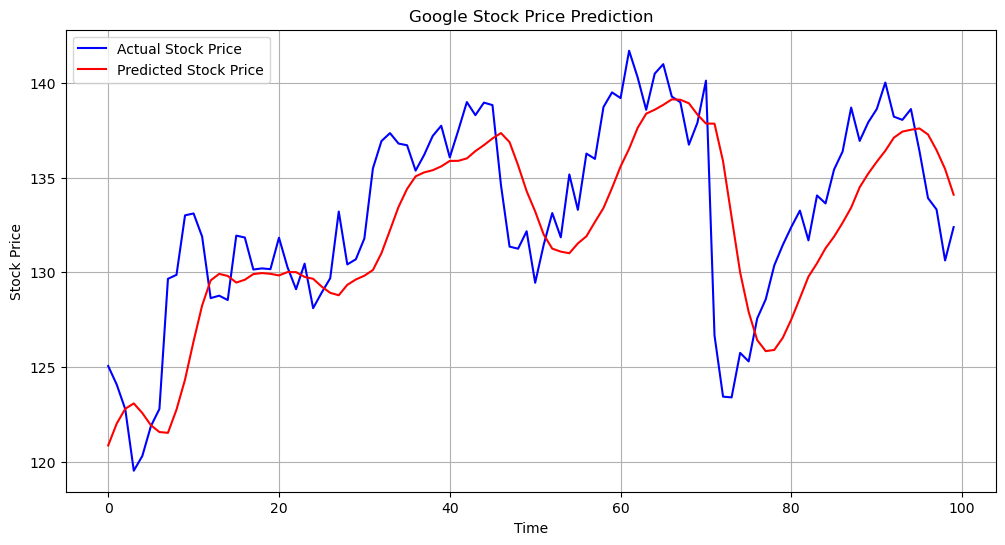

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [98]:
# You Now Have:
#             1. Accurate predictions based on engineered features
#             2. A fine-tuned LSTM model
#             3. A visual comparison of actual vs predicted prices